# 911 Calls Project


## 1. Introduction 

In this project, I will analyze some data about 911 emergency calls: Fire, Traffic, EMS for Montgomery County, PA. I will study the patterns and get more insights from the dataset.There are 423909 observations and 9 columns in the dataset, which includes Latitude, Longitude, Description of the Emergency Call, Zipcode, Title, TimeStamp: YYYY-MM-DD HH:MM:SS, Township, Address, and a dummy variable ‘e’ (always 1). 
Question of Interest: 1) Analyze geographical characteristics of the 911 calls 2) Analyze the relationship between the frequency of calls and time period. 3) Analyze reasons of 911 calls. (i.e. the relationship between reasons and time, reasons and geographical region) In the following part, I will inspect the data structure, make analysis, show visualizations, and state our main findings.

## 2. Data Frame Infomation

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
df = pd.read_csv('../Desktop/Data/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1
423908,40.155164,-75.264665,HOFFMAN ; LOWER GWYNEDD; 2018-11-16 @ 08:46:25;,19422.0,Traffic: DISABLED VEHICLE -,2018-11-16 08:46:25,LOWER GWYNEDD,HOFFMAN,1


Remove NAs in dataset.

In [9]:
df=df.dropna()
df.describe(include='all')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,371711.000000,371711.000000,371711,371711.000000,371711,371711,371711,371711,371711.0
unique,NaN,NaN,371648,NaN,137,361374,68,33369,NaN
top,NaN,NaN,WALDEN POND WAY & WOODVIEW LN; TOWAMENCIN; 201...,NaN,Traffic: VEHICLE ACCIDENT -,2018-07-09 13:23:16,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,4,NaN,83268,8,30995,4328,NaN
mean,40.160485,-75.315224,NaN,19234.743118,NaN,NaN,NaN,NaN,1.0
std,0.093353,0.238038,NaN,301.371813,NaN,NaN,NaN,NaN,0.0
min,30.333596,-95.595595,NaN,3366.000000,NaN,NaN,NaN,NaN,1.0
25%,40.102256,-75.398953,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.145223,-75.302071,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.232077,-75.206303,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


Remove outliers which are unreasonble in this dataset.

In [10]:
#remove rows with lat and lng that are out of Montgomery County, PA.
df=df[df['lat']>39]
df=df[df['lat']<41]
df=df[df['lng']> -77]
df=df[df['lng']< -74]
#remove rows with zipcode that is out of Montgomery County, PA.
df=df[df['zip']>18000]
df=df[df['zip']<20000]

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


#### Columns of Data
Our dataset contains 9 columns: 'lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'

In [7]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

#### Number of Rows & Variable Type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371678 entries, 0 to 423908
Data columns (total 9 columns):
lat          371678 non-null float64
lng          371678 non-null float64
desc         371678 non-null object
zip          371678 non-null float64
title        371678 non-null object
timeStamp    371678 non-null object
twp          371678 non-null object
addr         371678 non-null object
e            371678 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.4+ MB


The dataset has 371678 observations.
Variables include:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

#### Numeric Statistics & Categorical Variables Frequencies

In [9]:
df.describe(include='all')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,371678.000000,371678.000000,371678,371678.000000,371678,371678,371678,371678,371678.0
unique,NaN,NaN,371615,NaN,137,361355,68,33351,NaN
top,NaN,NaN,WALDEN POND WAY & WOODVIEW LN; TOWAMENCIN; 201...,NaN,Traffic: VEHICLE ACCIDENT -,2018-07-09 13:23:16,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,4,NaN,83257,8,30993,4328,NaN
mean,40.160501,-75.315354,NaN,19234.858028,NaN,NaN,NaN,NaN,1.0
std,0.086258,0.154421,NaN,278.384947,NaN,NaN,NaN,NaN,0.0
min,39.800203,-75.992765,NaN,18036.000000,NaN,NaN,NaN,NaN,1.0
25%,40.102256,-75.398933,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.145223,-75.302071,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.232077,-75.206303,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


## 3. Analysis + Visualization

### 3.1 What are the geographical characteristics of the 911 calls?
#### Geographical Characteristics: Where Calls Come From

In [10]:
df['zip'].value_counts().head(5)

19401.0    28649
19464.0    27944
19403.0    21631
19446.0    20496
19406.0    14093
Name: zip, dtype: int64

Top 5 zipcodes where 911 calls from: 19401, 19464, 19403, 19446, 19406

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    30993
ABINGTON        24696
NORRISTOWN      22749
POTTSTOWN       17130
CHELTENHAM      16924
Name: twp, dtype: int64

Top 5 township where 911 calls from: Lower Merion, Abington, Norristown, Pottstown, Cheltenham

Here I made a geographical plot of where calls from and zoom in Montgomery County, PA.

In [12]:
lat=df.lat
lng=df.lng
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)
px, py = lat_lng_to_pixels(lat, lng)

(29.0, 29.2, -37.7, -37.9)

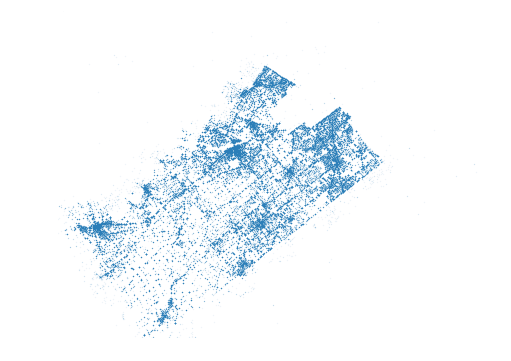

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(px, py, s=.1, alpha=0.1)
plt.axis('equal')
plt.xlim(29, 29.2)
plt.ylim(-37.7, -37.9)
plt.axis('off')

### 3.2 What is the relationship between the frequency of calls and time period?
#### Relationship Between Calls Frequency and Time

The original title column is sepecified, I created a new column for reasons. For example, if the title is EMS: BACK PAINS/INJURY, the reason would be EMS

In [12]:
#generate calls' reason category
df["reason category"] = df["title"].apply(lambda x: x.split(":")[0])

What are the three types of reasons and how many are they?

In [13]:
df["reason category"].value_counts()

EMS        190275
Traffic    125349
Fire        56054
Name: reason category, dtype: int64

In [14]:
type(df['timeStamp'].iloc[0])

str

The type of variable timeStamp is string. Need to convert it to datetime column.

In [15]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df["timeStamp"].loc[0]

Timestamp('2015-12-10 17:10:52')

Generate columns of year, month, date, day of week, hour.
Mapping day of week (numberic) column into categorical.

In [16]:
# adding new date time columns:
df["Year"] = df["timeStamp"].apply(lambda x: x.year)
df["Month"] = df["timeStamp"].apply(lambda x: x.month)
df["Date"] = df["timeStamp"].apply(lambda x: x.date())
df["Day of Week"] = df["timeStamp"].apply(lambda x : x.dayofweek)
df["Time"] = df["timeStamp"].apply(lambda x : x.time())
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
# Mapping day of week (numberic) column into categorical:
dow = {0:"Mon", 1:"Tues", 2:"Wed", 3:"Thurs" , 4:"Fri", 5:"Sat", 6:"Sun" }
df["Day of Week"] = df["Day of Week"].map(dow)

In [20]:
df['Date'].nunique()

1073

Top 10 dates of receiving the maximum in calls in all the years:

In [18]:
df["Date"].value_counts().head(10)

2018-03-02    1986
2018-11-15    1457
2018-03-03     836
2018-03-07     824
2016-01-23     801
2016-02-24     604
2017-12-15     594
2016-01-24     589
2018-08-13     587
2017-06-21     585
Name: Date, dtype: int64

The busiest year with total number of calls recieved:

In [19]:
df["Year"].value_counts().head(1)

2016    124479
Name: Year, dtype: int64

Plot for calls recieved yearly:

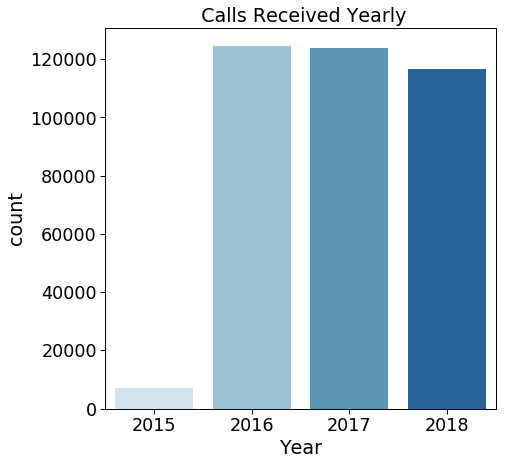

In [20]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Year", data= df, palette="Blues")
plt.title(" Calls Received Yearly")
plt.show()

The busiest month with total number of calls recieved:

In [21]:
df["Month"].value_counts().head(1)

1    33472
Name: Month, dtype: int64

Plot for calls recieved monthly combined of all years:

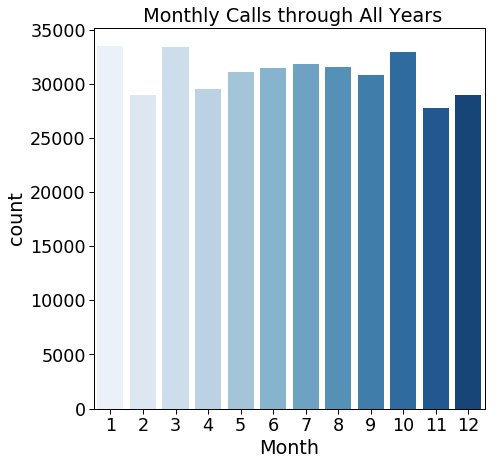

In [22]:
plt.figure(figsize=(7,7))

sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Month", data= df, palette="Blues")

plt.title(" Monthly Calls through All Years")
plt.show()

The busiest month with number of calls recieved in each year:

In [23]:
df["Month"].groupby(df["Year"]).value_counts().sort_values(ascending=False).head(1)

Year  Month
2018  3        13251
Name: Month, dtype: int64

Plot for calls recieved monthly in each year:

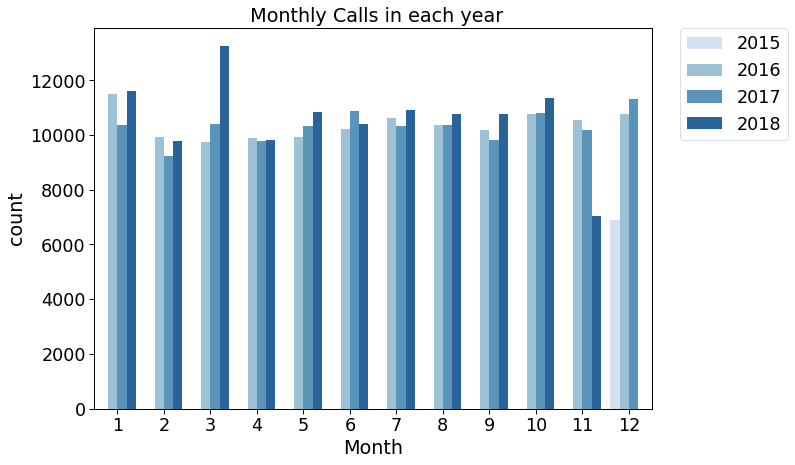

In [24]:
plt.figure(figsize = (10,7))

sns.set_context("paper", font_scale=2)
sns.countplot(data= df, x= "Month", hue= "Year", palette="Blues")

plt.title(" Monthly Calls in each year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The busiest day of week with total number of calls recieved:

In [25]:
df["Day of Week"].value_counts().head(1)

Fri    57635
Name: Day of Week, dtype: int64

Plot for calls recieved on each day of week combined of all years:

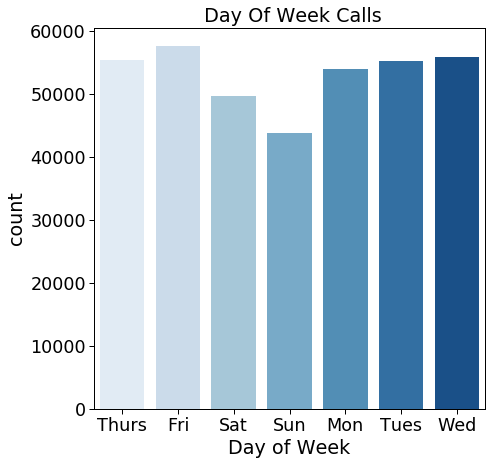

In [26]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= df, palette="Blues")
plt.title(" Day Of Week Calls")
plt.show()

The busiest day of week with number of calls recieved in each year:

In [27]:
df["Day of Week"].groupby(df["Year"]).value_counts().sort_values(ascending=False).head(1)

Year  Day of Week
2016  Fri            19145
Name: Day of Week, dtype: int64

Plot for calls recieved dayily in each year:

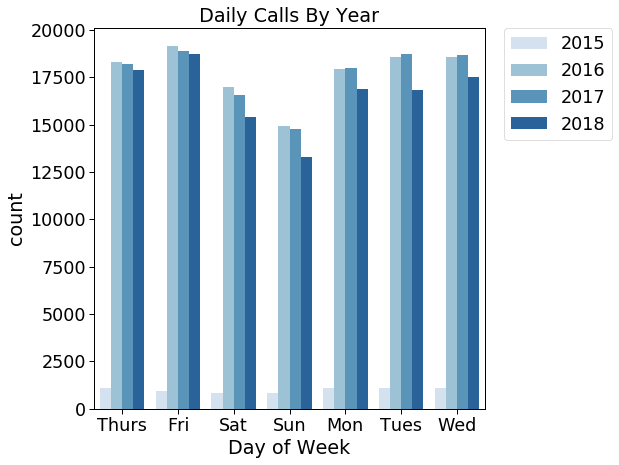

In [28]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= df, palette="Blues", hue= "Year" )     
plt.title(" Daily Calls By Year ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Total calls received in each hour of a day 

In [29]:
dayHour = df.groupby(by=['Day of Week','hour']).count()['reason category'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1051,885,838,754,760,914,1403,2361,2800,2919,...,3641,3882,4071,3850,3143,2898,2457,2169,1945,1636
Mon,1057,849,768,690,778,982,1475,2391,3098,3234,...,3100,3468,3596,3479,3048,2520,2191,1781,1491,1153
Sat,1314,1169,1054,868,837,860,1056,1441,1929,2428,...,2999,2812,2872,2825,2763,2671,2336,2156,1831,1663
Sun,1332,1208,1093,909,813,834,956,1359,1700,2158,...,2588,2440,2469,2507,2470,2319,2061,1782,1425,1267
Thurs,989,804,813,680,709,946,1516,2522,2989,3076,...,3406,3621,3532,3787,3145,2581,2310,1953,1585,1284


Plot for total calls recieved in each hour:

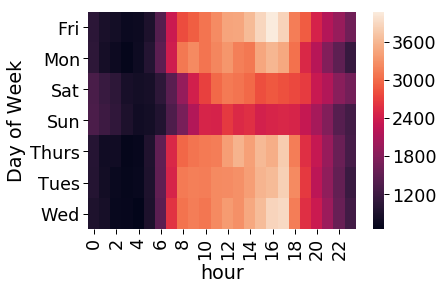

In [30]:
sns.heatmap(dayHour)

### 3.3 What are the reasons for the 911 calls?
#### Relationship Between Reasons and Time/Geographical Region

Use seaborn to create a countplot of the calls by 3 main reasons.

In [37]:
#adding a new column Reason:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])
df['Reason'].value_counts()

EMS        190275
Traffic    125349
Fire        56054
Name: Reason, dtype: int64

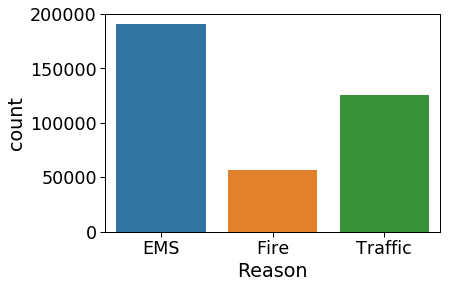

In [38]:
sns.countplot(x='Reason',data=df)

Creat 5 new columns Year, Month, Day of Week, Hour and Time. And map string names to the day of week. （Done in previous section)

Look at the amount of calls yearly, monthly and daily. The figures show no significant variance across months. But the "Calls Reasons Daily" plot indicates that the calls related to traffic on Sundays are significantly less than those on other days.

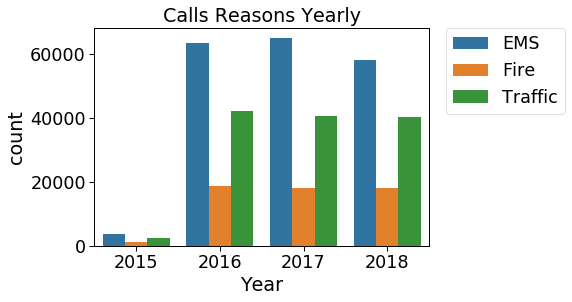

In [39]:
sns.countplot(x='Year',data=df,hue='Reason')
plt.title('Calls Reasons Yearly')
#relocate the legend 
plt.legend(bbox_to_anchor=[1.05, 1], loc=2, borderaxespad=0.)

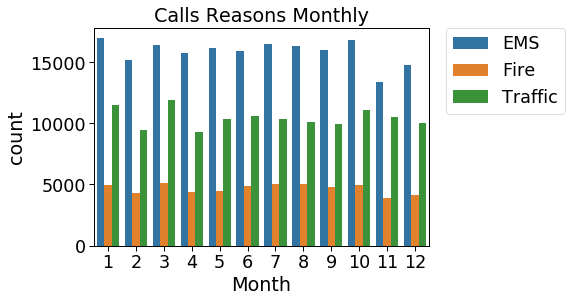

In [40]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.title('Calls Reasons Monthly')
#relocate the legend 
plt.legend(bbox_to_anchor=[1.05, 1], loc=2, borderaxespad=0.)

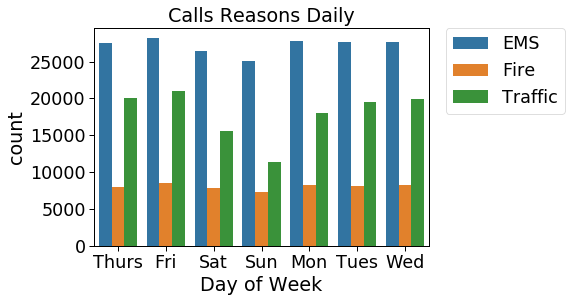

In [42]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.title('Calls Reasons Daily')
#relocate the legend 
plt.legend(bbox_to_anchor=[1.05, 1], loc=2, borderaxespad=0.)

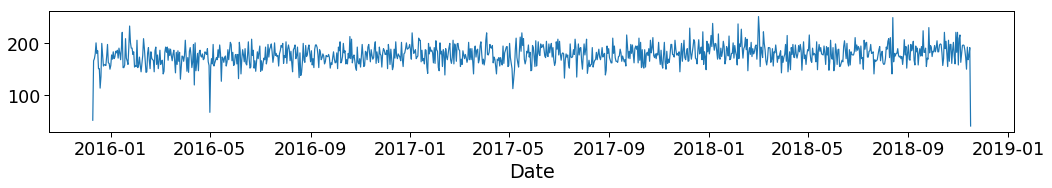

In [43]:
#Examine the calling reason by date
plt.rcParams["figure.figsize"] = (15,3)
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

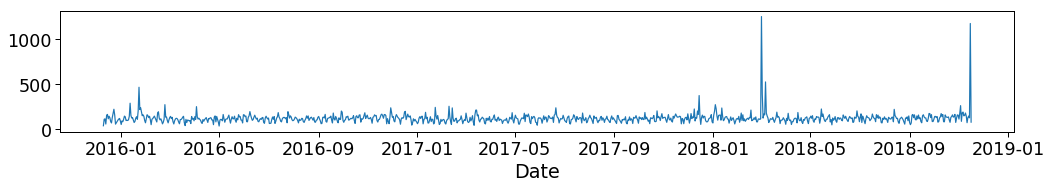

In [44]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

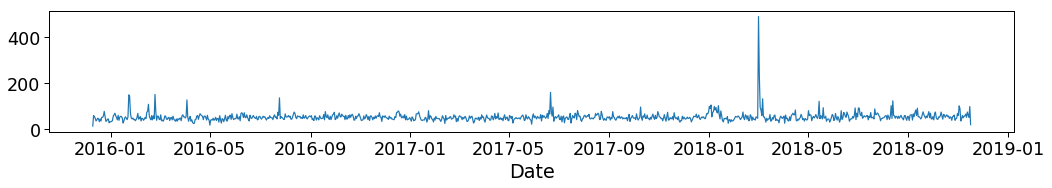

In [45]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

In March 2nd 2018, received the most 911 calls for all reasons because of the winter storm at that day.

In [47]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].idxmax()

datetime.date(2018, 3, 2)

In [51]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].idxmax()

datetime.date(2018, 3, 2)

In [49]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].idxmax()

datetime.date(2018, 3, 2)

/Users/langlin/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Day and Night Call Reports')

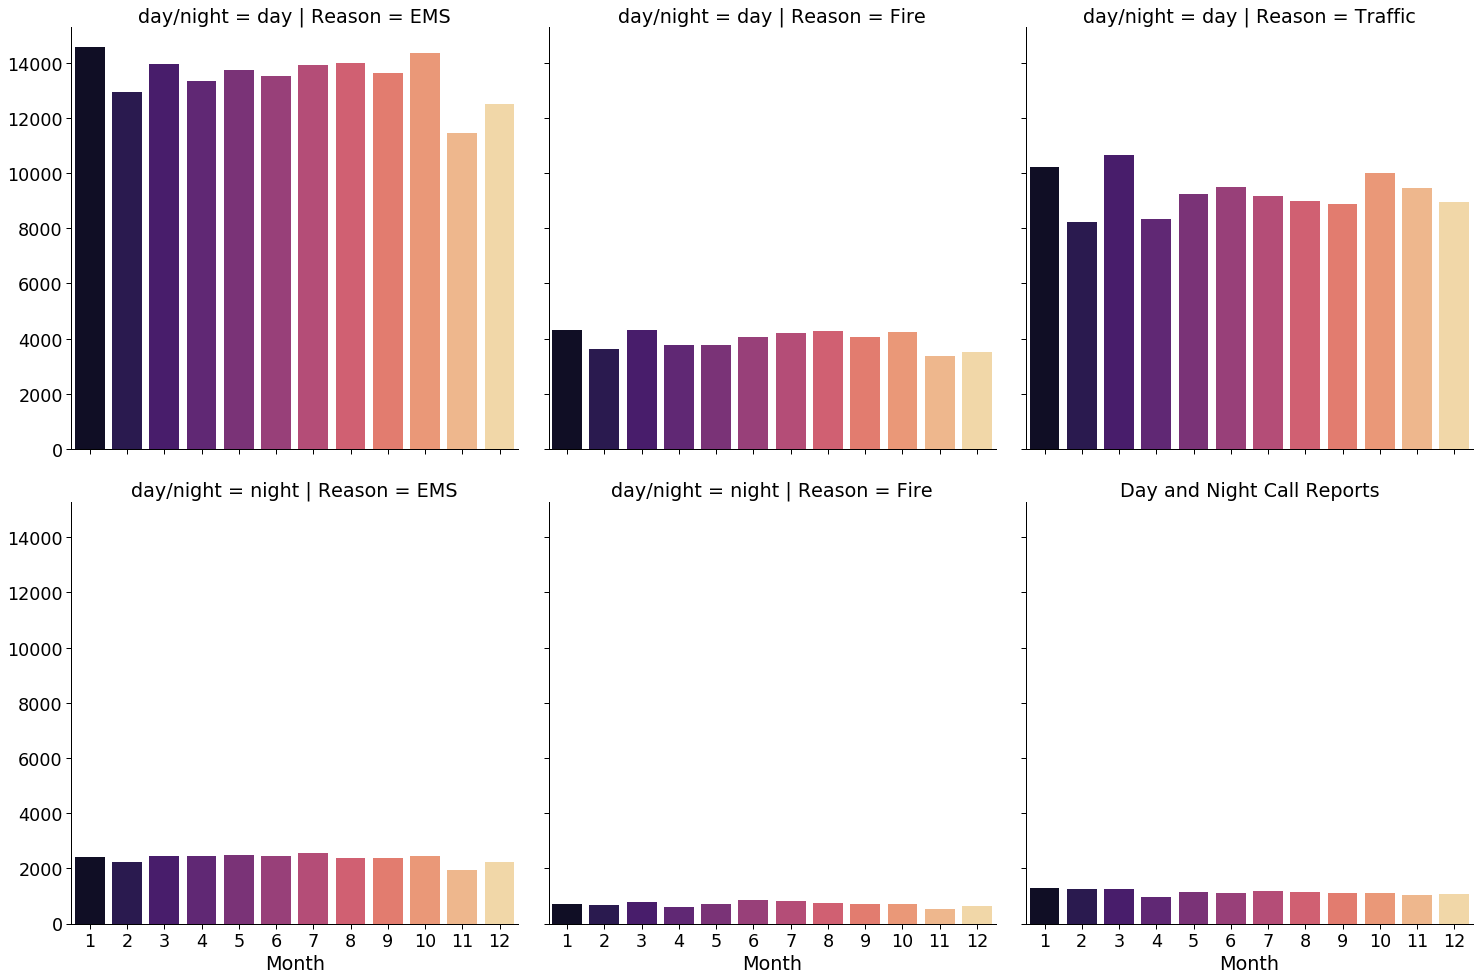

In [50]:
# Creating a column of the basis of sunlight
df["day/night"] = df["timeStamp"].apply(lambda x : "night" if int(x.strftime("%H")) > 19 else "day")
# Day and Night Call Reports(month)
g = sns.FacetGrid(df, row ="day/night", col="Reason", height = 7)
g.map(sns.countplot, "Month", palette= "magma")
plt.title("Day and Night Call Reports")

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Day and Night Call Reports')

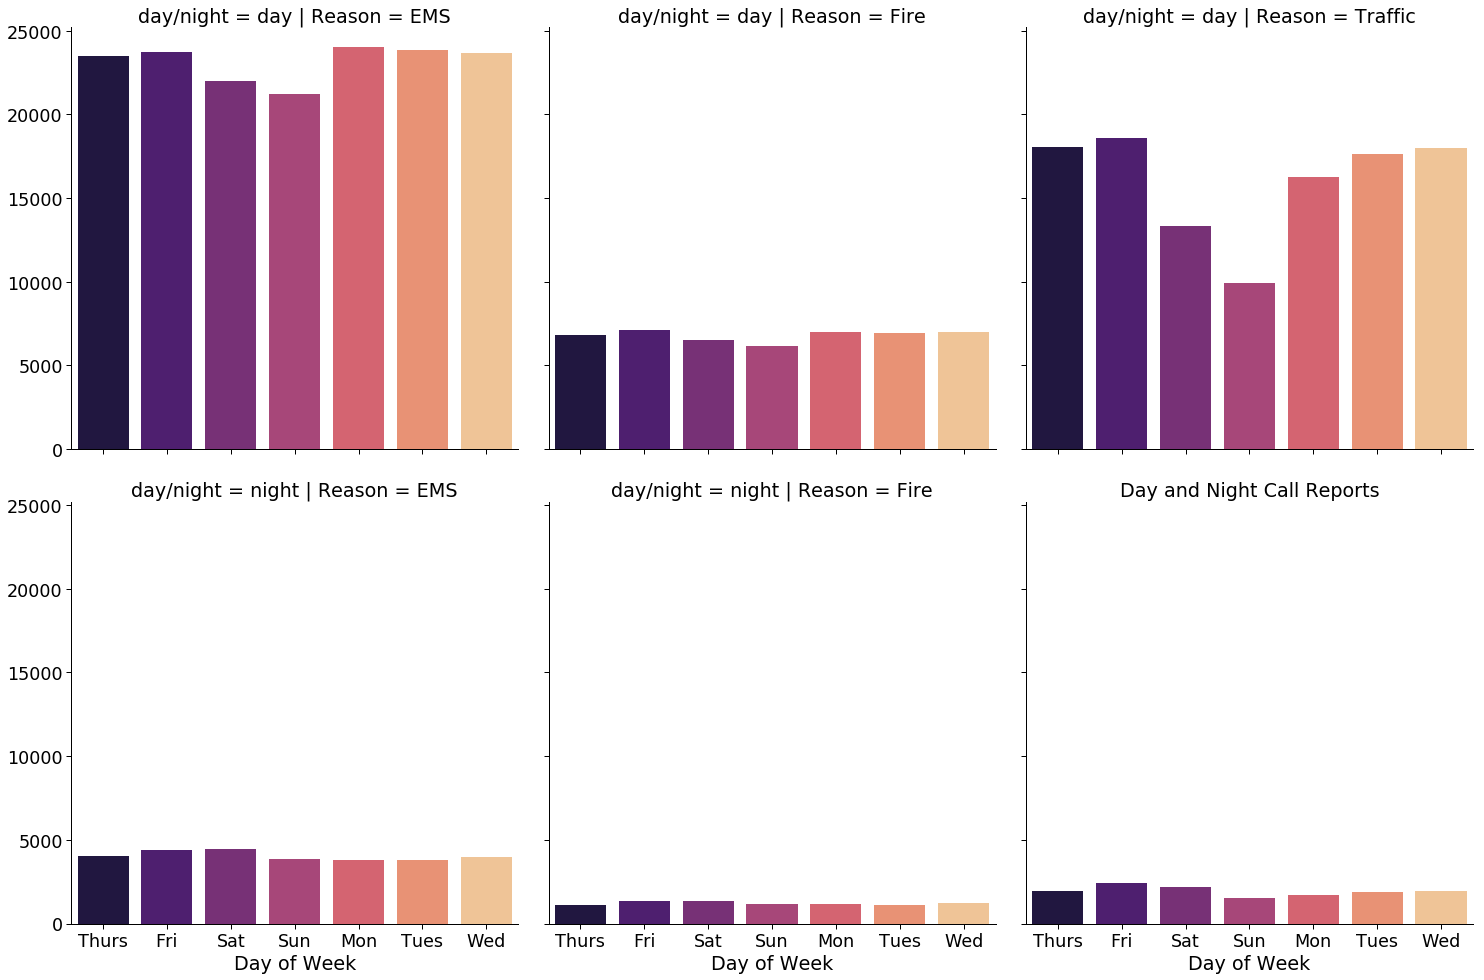

In [85]:
# Day and Night Call Reports(weekday)
g = sns.FacetGrid(df, row ="day/night", col="Reason", height = 7)
g.map(sns.countplot, "Day of Week", palette= "magma")
plt.title("Day and Night Call Reports")

## 4. Conclusion

In the above analysis, I first inspected the dataset and removed missing values. Then I answered the three questions that were mentioned at the beginning, supported by visualizations. We find out that: 1) The top 5 township where 911 calls from are: Lower Merion, Abington, Norristown, Pottstown, Cheltenham. 2) 2018-03-02 is the date that most calls were received. 2016 is the busiest year with 124484 calls received, whereas 2015 is the year they received the least number of calls. Friday is the day that received the most calls, whereas Sunday is the least. The busiest time period is 2pm-6pm. 3) The top reason that people call 911 is EMS(Emergency Medical Service) and the least reason is fire. The calls related to traffic on Sundays are significantly less than those on other days. In March 2nd 2018, I received the most 911 calls for all reasons because of the winter storm at that day. There are no significant variences in number of calls between day time and night time, among all reasons.
Limitations: The graphs above do not indicate any causal relationship between variables, so that I can only get insights from this analysis to help in further studies. Since the dataset only contains data for Montgomery County, Pennsylvania, my findings cannot be applied to any geographical regions outside this area.